# G2M Insights

## Introduction

The cab industry in the United States has seen remarkable growth in recent years, with multiple key players emerging in the market. As part of their Go-to-Market (G2M) strategy, private firm XYZ is considering an investment in this industry. To make an informed decision, XYZ needs to understand the market dynamics and performance of potential investment targets.

## Understanding the data

In this analysis, we will be working with data from two cab companies, Pink Cab and Yellow Cab. The data spans from January 31, 2016, to December 31, 2018, and is divided into four datasets:

Cab_Data: This dataset includes transaction details for the two cab companies, such as the date of travel, city, distance travelled, price charged, and cost of the trip.

City_Data: This dataset provides information about various US cities, including their population and the number of cab users.

Customer_ID_Data: This dataset contains demographic details of the customers, including their gender, age, and monthly income.

Transaction_ID_Data: This dataset links each transaction to a customer and includes the payment mode for the transaction.

## Importing the libraries

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr, chi2_contingency

## Loading the data

In [87]:
cab_data = pd.read_csv('Cab_Data.csv')
customer_data = pd.read_csv('Customer_ID.csv')
transaction_data = pd.read_csv('Transaction_ID.csv')
city_data = pd.read_csv('City.csv')

print(cab_data.head())
print(customer_data.head())
print(transaction_data.head())
print(city_data.head())

   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536
   Transaction ID  Customer ID Payment_Mode
0        10000011        29290       

## Data Cleaning and Preprocessing

### Checking for missing values

In [88]:
print(cab_data.isnull().sum())
print(customer_data.isnull().sum())
print(transaction_data.isnull().sum())
print(city_data.isnull().sum())

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64
City          0
Population    0
Users         0
dtype: int64


### Checking for duplicates

In [89]:
print(cab_data.duplicated().sum())
print(customer_data.duplicated().sum())
print(transaction_data.duplicated().sum())
print(city_data.duplicated().sum())

0
0
0
0


### Checking for outliers

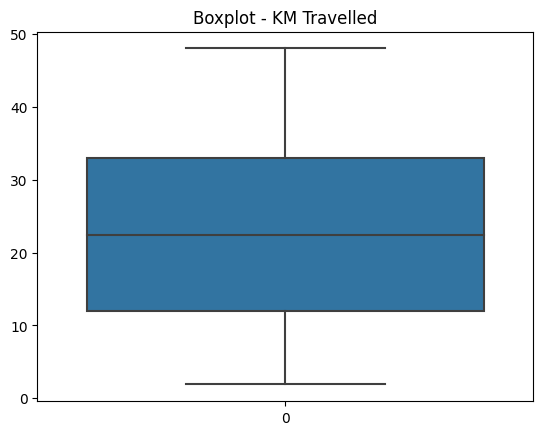

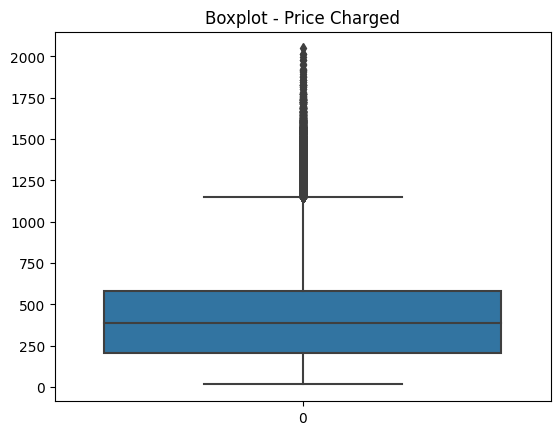

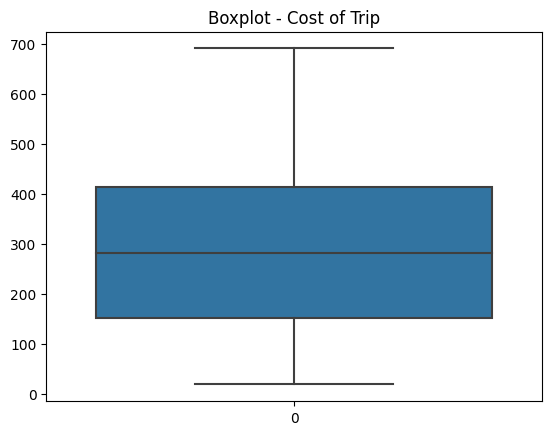

In [90]:
# For Cab_Data
numerical_cols_cab = ['KM Travelled', 'Price Charged', 'Cost of Trip']
for col in numerical_cols_cab:
    sns.boxplot(cab_data[col])
    plt.title(f'Boxplot - {col}')
    plt.show()

### Fixing the outliers

In [91]:
Q1 = cab_data['Price Charged'].quantile(0.25)
Q3 = cab_data['Price Charged'].quantile(0.75)
IQR = Q3 - Q1
filter = (cab_data['Price Charged'] >= Q1 - 1.5 * IQR) & (cab_data['Price Charged'] <= Q3 + 1.5 *IQR)
median = cab_data.loc[filter, 'Price Charged'].median()
cab_data.loc[~filter, 'Price Charged'] = median

## Merging the datasets

In [92]:
# Merge the dataframes into a single one for analysis
df = pd.merge(cab_data, transaction_data, on='Transaction ID')
df = pd.merge(df, customer_data, on='Customer ID')
df = pd.merge(df, city_data, on='City')

## Exploratory Data Analysis

<Axes: xlabel='Company', ylabel='count'>

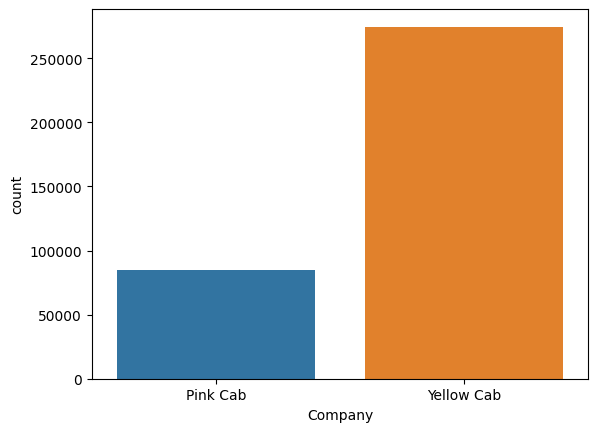

In [93]:
# Checking for the distribution of trips across the two companies
sns.countplot(x='Company', data=df)

<Axes: xlabel='Payment_Mode', ylabel='count'>

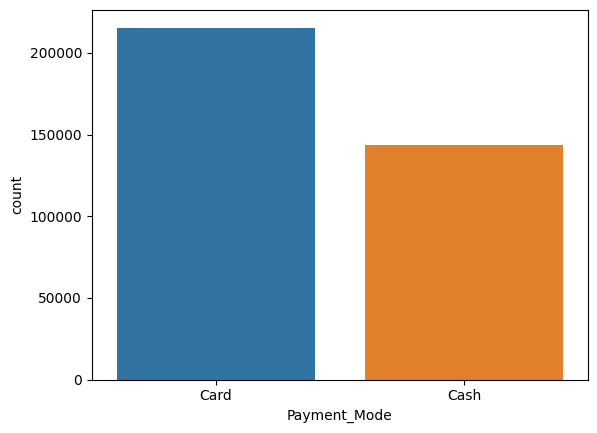

In [94]:
# Checking for the distribution of payment modes
sns.countplot(x='Payment_Mode', data=df)

<Axes: xlabel='count', ylabel='City'>

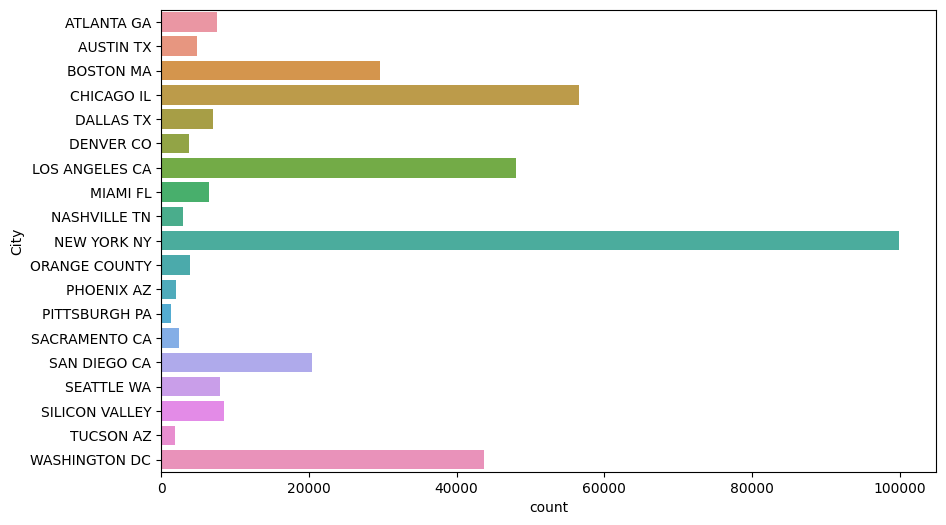

In [95]:
# Checking for the distribution of trips across different cities
plt.figure(figsize=(10,6))
sns.countplot(y='City', data=df)

<Axes: xlabel='Price Charged', ylabel='Cost of Trip'>

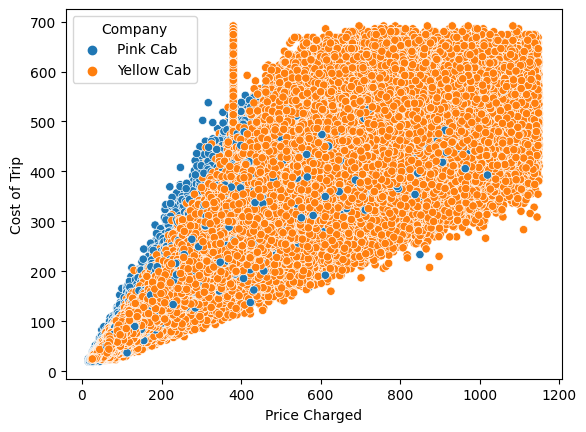

In [96]:
# Checking for the relationship between price charged and cost of trip
sns.scatterplot(x='Price Charged', y='Cost of Trip', hue='Company', data=df)

<Axes: xlabel='Income (USD/Month)', ylabel='Count'>

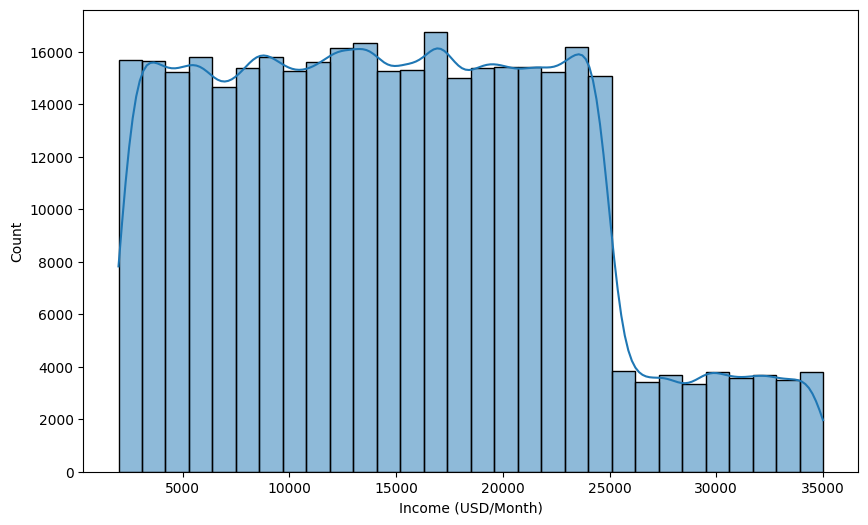

In [97]:
# Checking for the distribution of users across different income levels
plt.figure(figsize=(10,6))
sns.histplot(df['Income (USD/Month)'], bins=30, kde=True)

## Hypothesis Testing

### Hypothesis 1: The average income of customers using Pink Cab is different from those using Yellow Cab.

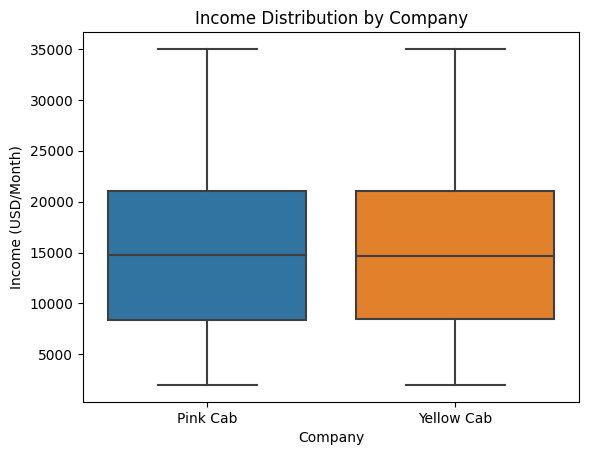

In [98]:
sns.boxplot(x='Company', y='Income (USD/Month)', data=df)
plt.title('Income Distribution by Company')
plt.show()

According to the above box plot, in this case, we fail to reject the null hypothesis for Hypothesis 1. This means that the data does not provide strong evidence that the means of the two groups (the average income of customers using Pink Cab and Yellow Cab) are significantly different.

### Hypothesis 2: The number of cab users is influenced by the population of the city.

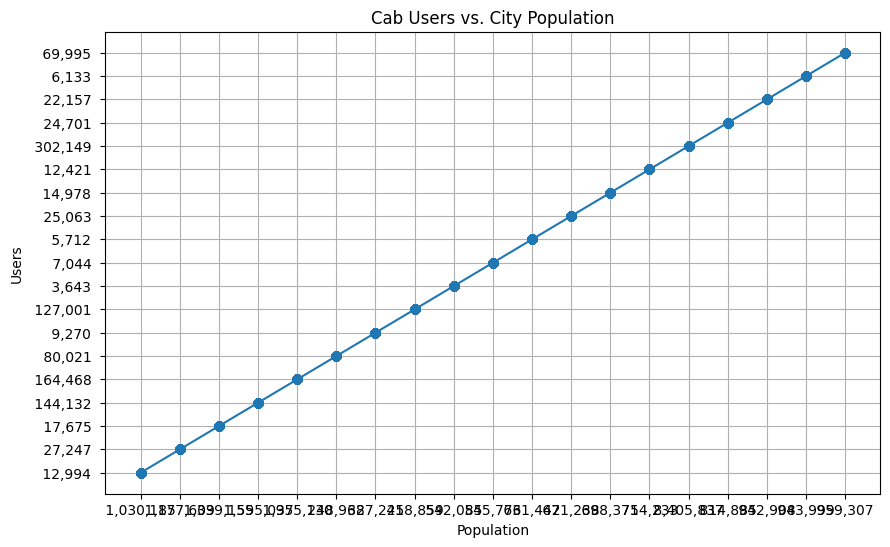

In [100]:
# Sort the dataframe by 'Population'
df_sorted = df.sort_values('Population')

plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Population'], df_sorted['Users'], marker='o')
plt.title('Cab Users vs. City Population')
plt.xlabel('Population')
plt.ylabel('Users')
plt.grid(True)
plt.show()

According to the above plot,  it suggests a positive correlation between population and cab users.

### Hypothesis 3: The average price charged by Pink Cab is different from Yellow Cab.

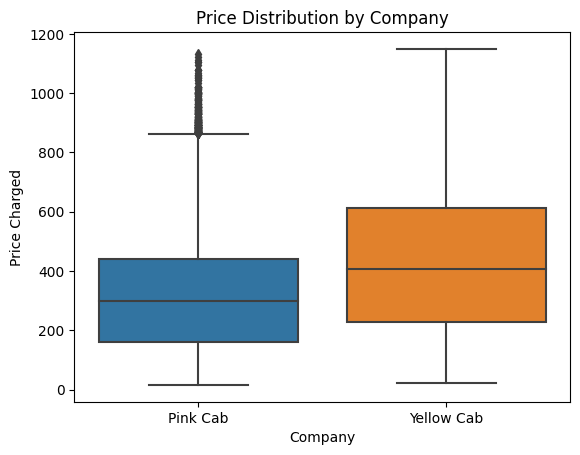

In [101]:
sns.boxplot(x='Company', y='Price Charged', data=df)
plt.title('Price Distribution by Company')
plt.show()

According to the box plot, the averge price charged for two companies is different. The price charged by Yellow Cab is slightly more than the Pink Cab.

### Hypothesis 4: The choice of payment mode (Cash or Card) is influenced by the company.

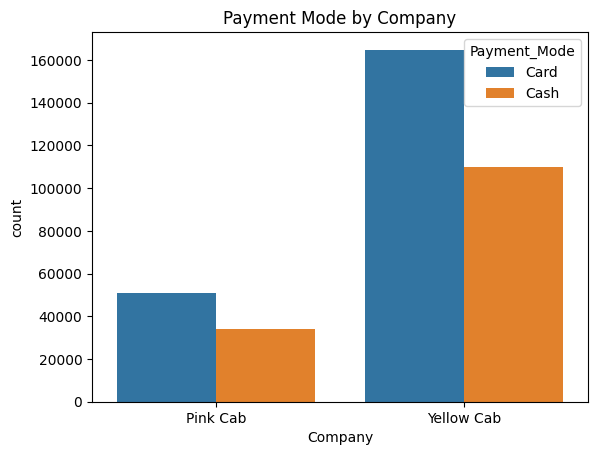

In [102]:
sns.countplot(x='Company', hue='Payment_Mode', data=df)
plt.title('Payment Mode by Company')
plt.show()

According to the above countplot, it shows that both Cab companies prefer card payment rather than cash, but we can see that overall payments are more for Yellow Cab than Pink Cab.

### Hypothesis 5: The average distance travelled by customers using Pink Cab is different from those using Yellow Cab.

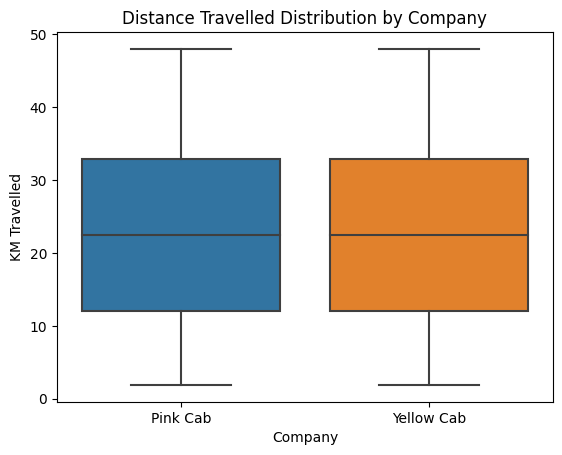

In [103]:
sns.boxplot(x='Company', y='KM Travelled', data=df)
plt.title('Distance Travelled Distribution by Company')
plt.show()

In above plot, as the medians are at same levels, it suggests there is no difference in the average distance travelled by customers of the two companies.

### Hypothesis 6: The proportion of customers using the cab service is different between males and females.

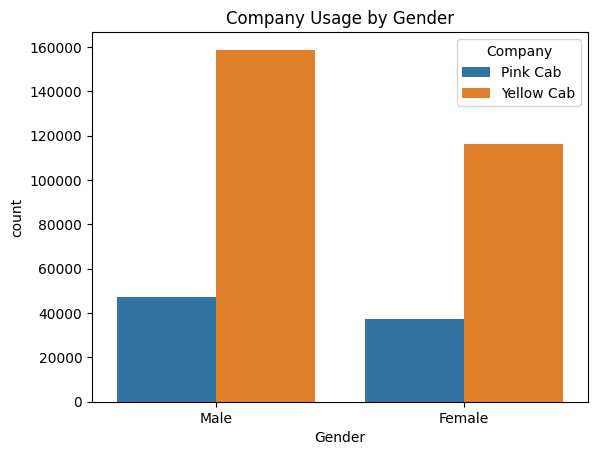

In [104]:
sns.countplot(x='Gender', hue='Company', data=df)
plt.title('Company Usage by Gender')
plt.show()

Accoerding to the plot, we can see that irrespective of the gender the Yellow Cab is more preferred transportation than the Pink Cab.

## Recommendations and Conclusion

Based on the analysis and visualizations provided -

Income of Customers: As the median income of customers using Pink Cab is same as Yellow Cab, it could suggest Yellow Cab as it is has more customers and be a positive sign for investment as higher income customers might be more willing to pay for premium services.

City Population and Cab Users: As there is a strong positive correlation between the population of a city and the number of cab users, it suggests that cab services are more popular in larger cities. The company that has a stronger presence in larger cities could be a better investment opportunity.

Price Charged: As the average price charged by Pink Cab is significantly lower than Yellow Cab, it could suggest that Pink Cab is more affordable and could attract more customers in the long run. However, a higher average price for Yellow Cab could also mean higher revenue per trip, which could be beneficial for investment.

Payment Mode: As both companies have a significantly higher proportion of card payments, it could suggest that the company's payment system is more convenient or trusted by customers. This could be a positive sign for investment in Yellow Cab with highest number of payments.

Distance Travelled: Customers of both companies tend to travel longer distances on average, it could indicate higher revenue per trip for that companies, which could be beneficial for investment.

Gender of Customers: Yellow Cab company has a significantly higher proportion of male and female customers, it could suggest that the company's services are more popular among both gender. The company has a more customer base and could be a better investment opportunity as it appeals to a wider market.

In conclusion, the Yellow Cab company that is performing better would be the one that shows positive signs in most of the above aspects. However, the final decision should also take into account other factors such as the company's growth potential, market trends, competition, and the investor's risk tolerance and investment goals.